<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
plt.style.use("ggplot")
%matplotlib inline

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [8]:
data = pd.read_csv('DMV_Written_Tests.csv')
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

/tmp/ipython-input-169645580.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


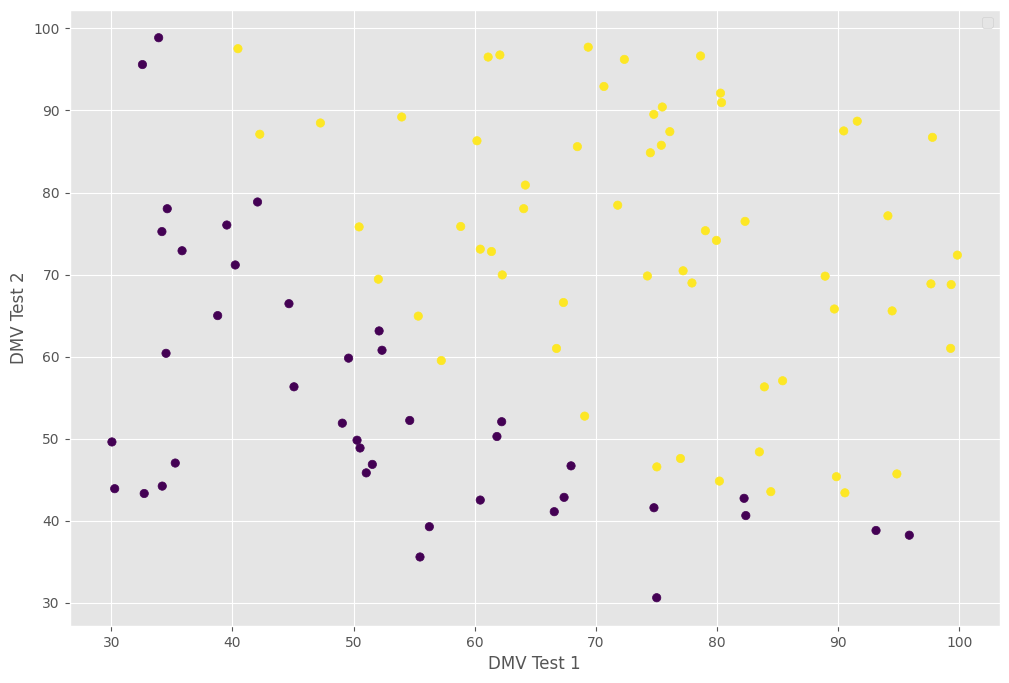

In [9]:
plt.scatter(data['DMV_Test_1'], data['DMV_Test_2'], c=data['Results'])
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.legend()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [10]:
def sigmoid(z):
    din = 1.0 + np.exp(-z)
    return 1.0/din

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)})))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [14]:
def cost_function(X, y, W, Wo):
    m = len(y)
    h = sigmoid(X @ W + Wo)
    cost = -(1/m) * np.sum( y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def gradient(X, y, W, Wo):
    m = len(y)
    h = sigmoid(X @ W + Wo)
    grad_W = (1/m) * (X.T @ (h - y))
    grad_Wo = (1/m) * np.sum(h - y)
    return grad_W, grad_Wo

### Task 6: Cost and Gradient at Initialization
---

In [16]:
X = data[['DMV_Test_1', 'DMV_Test_2']].values
y = data['Results'].values

W = np.zeros(X.shape[1])   # shape (n,)
Wo = 0.0

print(f"Initial cost: {cost_function(X, y, W, Wo)}")
print(f"Initial gradient: {gradient(X, y, W, Wo)}")

Initial cost: 0.13862943611198905
Initial gradient: (array([-12.00921659, -11.26284221]), np.float64(-0.1))


NameError: name 'pd' is not defined

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [17]:
def gradient_descent(X, y, W, Wo, alpha, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        grad_W, grad_Wo = gradient(X, y, W, Wo)
        W = W - alpha * grad_W
        Wo = Wo - alpha * grad_Wo
        cost = cost_function(X, y, W, Wo)
        cost_history.append(cost)

    return W, Wo, cost_history

In [20]:
alpha = 0.001
num_iterations = 100000

W_optimized, Wo_optimized, cost_history = gradient_descent(X, y, W, Wo, alpha, num_iterations)

print(f"Optimized W: {W_optimized}")
print(f"Optimized Wo: {Wo_optimized}")
print(f"Optimized cost: {cost_history[-1]}")

Optimized W: [0.04528064 0.03819149]
Optimized Wo: -4.811800271032425
Optimized cost: -0.07050529315847358


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

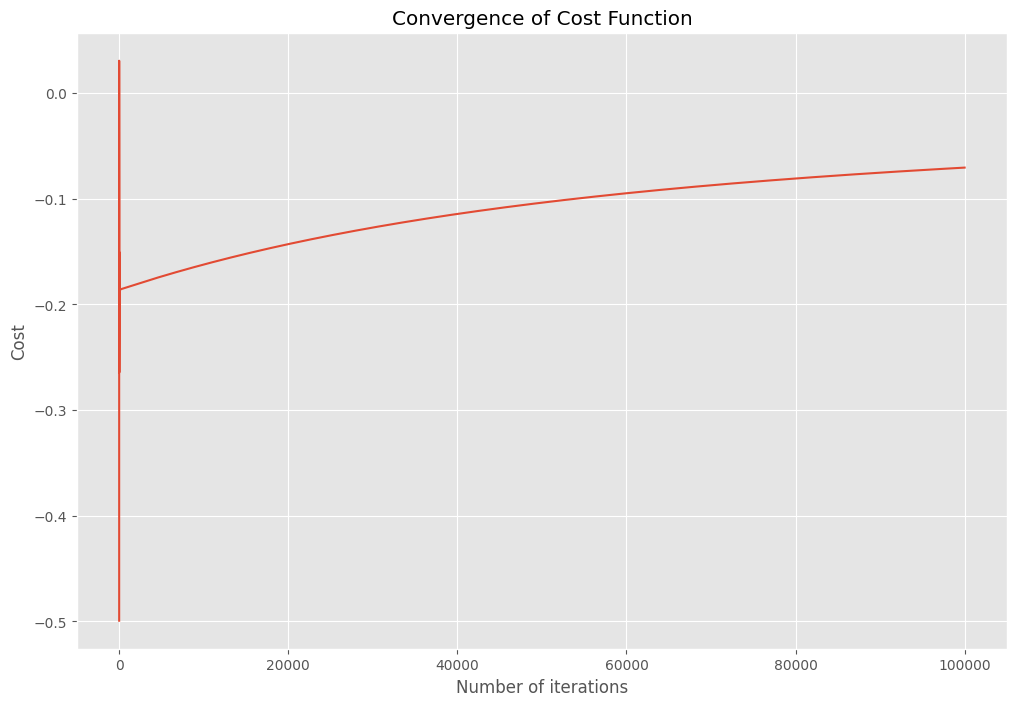

In [21]:
plt.plot(cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Convergence of Cost Function')
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

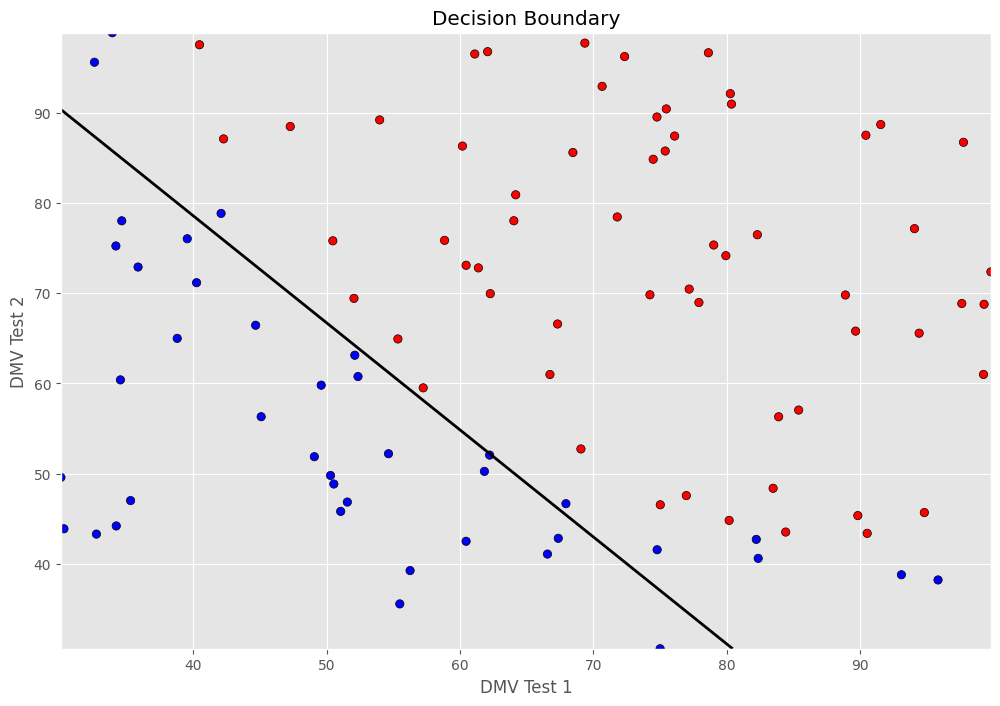

In [25]:

# Scatter plot of data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Decision boundary
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))

h = sigmoid(np.c_[xx1.ravel(), xx2.ravel()] @ W_optimized + Wo_optimized)
h = h.reshape(xx1.shape)

plt.contour(xx1, xx2, h, levels=[0.5], linewidths=2, colors='black')

plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.title('Decision Boundary')
plt.show()


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [42]:
def predict(X, W, Wo):
    h = sigmoid(X @ W + Wo)
    return np.where(h >= 0.5, 1, 0)

In [43]:
y_pred = predict(X, W_optimized, Wo_optimized)

accuracy = np.mean(y_pred == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

Training Accuracy: 91.00%


In [53]:
# Pick 5 random samples
sample_idx = np.random.choice(len(X), 5, replace=False)
X_sample = X[sample_idx]
y_sample = y[sample_idx]

# Get predictions
y_pred_sample = predict(X_sample, W_optimized, Wo_optimized)

# Display results
print("Sample Predictions:")
print("DMV_Test_1 | DMV_Test_2 | True Result | Predicted Result")
for i in range(len(sample_idx)):
    print(f"{X_sample[i,0]:9.2f} | {X_sample[i,1]:9.2f} | {y_sample[i]:11d} | {y_pred_sample[i]:16d}")

Sample Predictions:
DMV_Test_1 | DMV_Test_2 | True Result | Predicted Result
    38.79 |     65.00 |           0 |                0
    99.32 |     68.78 |           1 |                1
    50.53 |     48.86 |           0 |                0
    39.54 |     76.04 |           0 |                0
    82.37 |     40.62 |           0 |                1
